### Problem Statement

#### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


#### In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


#### They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

### AIM

#### we are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Step 1: Reading and Understanding the Data

#### Importing Numpy and Pandas for reading and understanding the data

In [1]:
import numpy as np
import pandas as pd

# To ignore any warnings while plotting

import warnings
warnings.filterwarnings("ignore")

#### reading the dataset

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.shape

(730, 16)

#### we can see that all the entries are filled, we can skip dropping of rows or columns

In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### checking duplicate entries

In [6]:
df.duplicated().sum()

0

#### there are no duplicate entries

In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### we can drop instant column since it is only an index

In [8]:
df = df.drop(['instant'],axis = 1)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### we can also drop dteday, since we have dteday spilt into year, month, and weekday which we can use for our analysis

In [9]:
df = df.drop(['dteday'], axis=1)

### Step 2: Visualizing the Data

#### importing matplotlib and seaborn

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### visualizing numeric variables
#### let's make a pair plot to visualize numeric variables

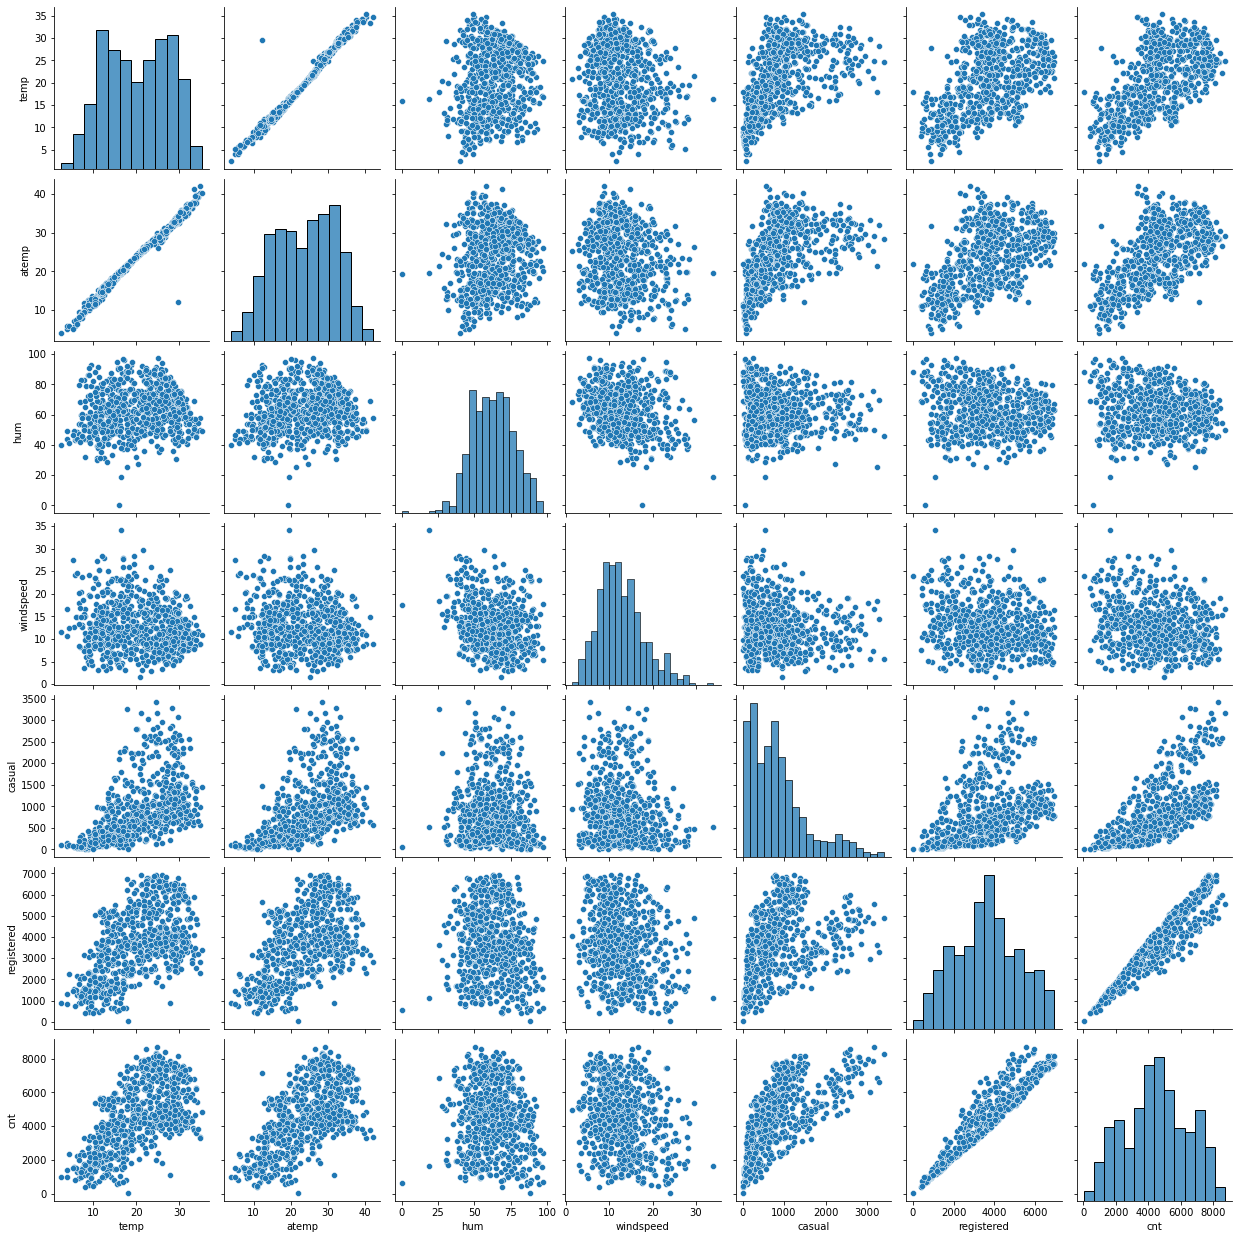

In [12]:
# Only the following variables are considered numeric since they have continuous values, rest all variables have Definite values

numeric = ['temp','atemp','hum','windspeed','casual','registered','cnt']
sns.pairplot(df[numeric])
plt.show()

#### cnt is our target variable
#### from the paiplot we see that temp, atemp, registered and casual are somewhat linearly related to cnt
#### on the other hand humidity and windspeed are scattered over the plot

#### we can slo see that there is a very strong correlation between temp and atemp, this might lead to high VIF in our analysis, which we will analyze in a short while

#### visualizing categorical variables

In [13]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


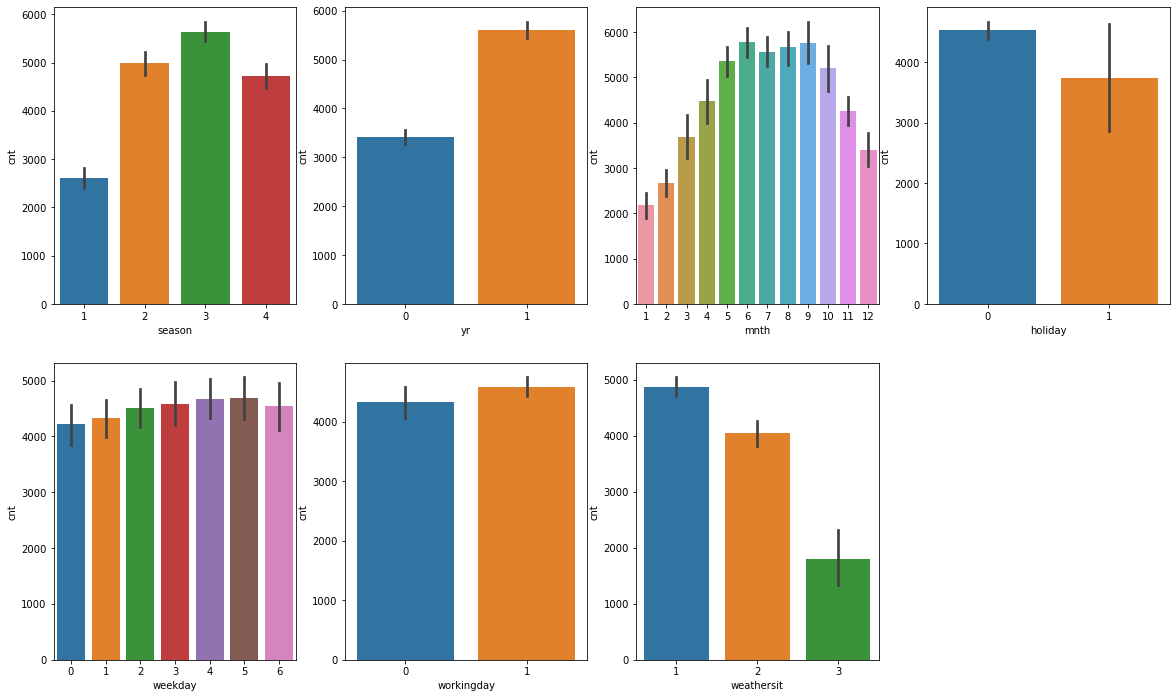

In [14]:
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.barplot(df['season'],df['cnt'])
plt.subplot(2,4,2)
sns.barplot(df['yr'],df['cnt'])
plt.subplot(2,4,3)
sns.barplot(df['mnth'],df['cnt'])
plt.subplot(2,4,4)
sns.barplot(df['holiday'],df['cnt'])
plt.subplot(2,4,5)
sns.barplot(df['weekday'],df['cnt'])
plt.subplot(2,4,6)
sns.barplot(df['workingday'],df['cnt'])
plt.subplot(2,4,7)
sns.barplot(df['weathersit'],df['cnt'])
plt.show()

#### we can see that season and month barplot is quite similar and we can consider season for our analysis as different months are binned in these seasons

#### we can also see that there is very little difference between successive days of week in weekday barplot and the somewhat similar behaviour is captured by workingday, so we can proceed with workingday for our analysis, i.e more bikes are rented during working days than weekends which are usually non working days, however there is only a small difference.

### Step 3: Data Preparation

#### we need to first convert season and weathersit into categorical values so that we can get dummy variables out of them

In [15]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### converting season to categorical values

In [16]:
def convert_season(x):
    if x==1:
        return "spring"
    elif x==2:
        return "summer"
    elif x==3:
        return "fall"
    elif x==4:
        return "winter"
df['season'] = df['season'].apply(convert_season)

In [17]:
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

#### converting weathersit to categorical values

In [18]:
def convert_weather(x):
    if x==1:
        return "clear"
    elif x==2:
        return "misty"
    elif x==3:
        return "rainy_or_snowy"
    elif x==4:
        return "extreme"
        
df['weathersit'] = df['weathersit'].apply(convert_weather)

In [19]:
df['weathersit'].value_counts()

clear             463
misty             246
rainy_or_snowy     21
Name: weathersit, dtype: int64

#### now we create dummy variables

#### variable season has 4 levels so we need only three levels to represent this varaible

In [20]:
status1 = pd.get_dummies(df['season'], drop_first=True)
status1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


#### The different levels can be interpreted as 
1. spring : 100
2. summer : 010
3. winter : 001
4. fall : 000

#### creating dummies for weathersit

In [21]:
status2 = pd.get_dummies(df['weathersit'], drop_first=True)
status2.head()

,misty,rainy_or_snowy
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


#### The different levels can be interpreted as 
1. misty : 10
2. rainy_or_snowy : 01
3. clear : 00

#### we can now drop the columns from which dummy varaibles were derived, we can also drop month and weekday since we wont be using those for our analysis

In [22]:
df = df.drop(['season','weathersit','mnth','weekday'], axis = 1)

#### we know that registered and casual add upto cnt, so taking either of these doesn't make sense, instead we can take the ratio of these to create a new column

In [23]:
df['cas_to_registered'] = round(df['casual']/df['registered'],2)
df['cas_to_registered']

0      0.51
1      0.20
2      0.10
3      0.07
4      0.05
       ... 
725    0.13
726    0.26
727    0.13
728    0.25
729    0.19
Name: cas_to_registered, Length: 730, dtype: float64

In [24]:
# dropping registered and casual

df = df.drop(['registered','casual'], axis = 1)

In [25]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,cas_to_registered
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0.51
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0.20
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0.10
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0.07
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0.05


#### concatenating our dummy variables to the dataset

In [26]:
df = pd.concat([df,status1], axis = 1)
df = pd.concat([df,status2], axis = 1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,cas_to_registered,spring,summer,winter,misty,rainy_or_snowy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0.51,1,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0.20,1,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0.10,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0.07,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0.05,1,0,0,0,0


### Step 4: Splitting the data into training and test sets

#### importing the train_test_split from sklearn

In [27]:
from sklearn.model_selection import train_test_split

# to get psuedo random split
np.random.seed(0)

#### performing the split

In [28]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [29]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,cas_to_registered,spring,summer,winter,misty,rainy_or_snowy
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0.14,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0.15,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0.31,1,0,0,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0.25,1,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0.36,0,1,0,1,0


In [30]:
df_train.shape

(510, 14)

In [31]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,cas_to_registered,spring,summer,winter,misty,rainy_or_snowy
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,1.03,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0.16,0,1,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0.10,0,0,1,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0.23,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0.17,0,1,0,0,0


In [32]:
df_test.shape

(219, 14)

#### now we can see that temp, atemp, humidity, windspeed etc are on a different scale and the categorical variables are on a different scale, so in order to make interpretation of these variables in the model easy we perform scaling.

#### here we will be performing min max scaling
#### importing minmax scaler

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#### apply the scaler to all the numeric columns

In [34]:
num_vars = ['temp','atemp','hum','windspeed','cas_to_registered','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,cas_to_registered,spring,summer,winter,misty,rainy_or_snowy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0.126214,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.135922,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0.291262,1,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0.233010,1,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.339806,0,1,0,1,0


In [36]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,cas_to_registered,spring,summer,winter,misty,rainy_or_snowy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.218942,0.243137,0.245098,0.24902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.184249,0.429398,0.430568,0.43287,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.097087,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.155340,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.262136,0.000000,0.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


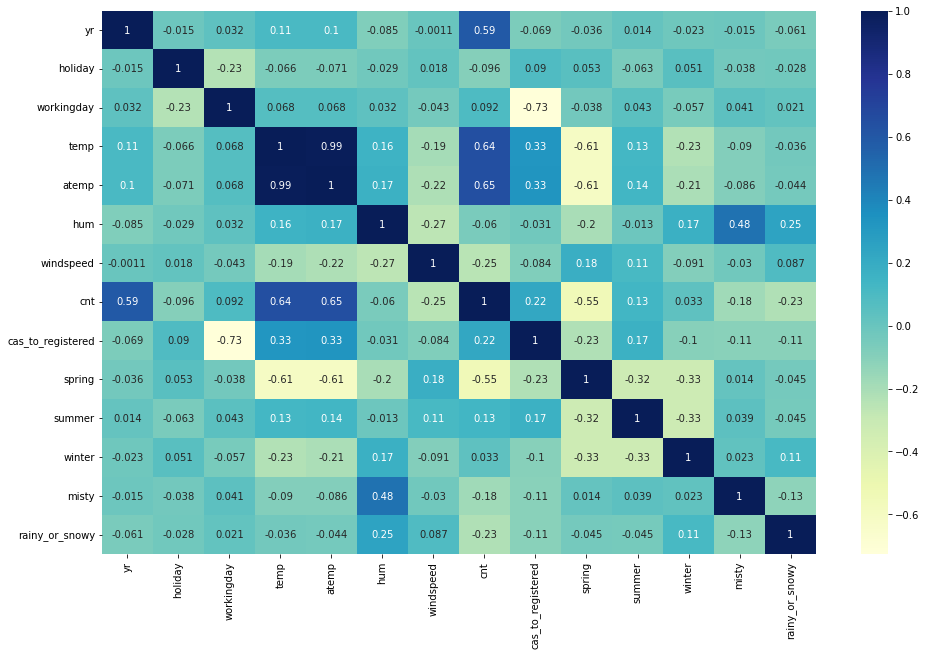

In [37]:
# Let's check correlation coefficients to see which variables are higly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

#### here we can see that there is a very high correlation between yr and cas_to_registered, also between temp and atemp. temp and atemp are in turn highly correlated to cnt

#### Since the number of variables are less we follow a manual top down approach where we start with a all variables and keep on removing variables

### Dividing X and Y sets for model building

In [38]:
y_train = df_train.pop('cnt')
X_train = df_train

### Step 5: Building a Linear Model

#### importing statsmodels

In [39]:
import statsmodels.api as sm

In [40]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

In [41]:
# Create a model
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          1.54e-186
Time:                        16:56:00   Log-Likelihood:                 502.87
No. Observations:                 510   AIC:                            -977.7
Df Residuals:                     496   BIC:                            -918.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2051      0.038      5.440      0.000       0.131       0.279
yr                    0.2383      0.008     28.471      0.000       0.222       0.255
holiday              -0.0585      0.027     -2.188      0.029      -0.111      -0.006
workingday            0.0858      0.015      5.573      0.000       0.056       0.116
temp                  0.4143      0.137      3.026      0.003       0.145       0.683
atemp                 0.0110      0.140      0.079      0.937      -0.263       0.285
hum                  -0.1225      0.038     -3.207      0.001      -0.198      -0.047
windspeed            -0.1607      0.027     -5.987      0.000      -0.213      -0.108
cas_to_registered     0.2264      0.042      5.452      0.000       0.145       0.308
spring               -0.0786      0.020     -3.872      0.000      -0.118      -0.039
summer                0.0247      0.014      1.748      0.081      -0.003       0.052
winter                0.0867      0.017      5.155      0.000       0.054       0.120
misty                -0.0512      0.011     -4.785      0.000      -0.072      -0.030
rainy_or_snowy       -0.2264      0.027     -8.400      0.000      -0.279      -0.173
==============================================================================
Omnibus:                       81.551   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.727
Skew:                          -0.767   Prob(JB):                     1.77e-51
Kurtosis:                       5.940   Cond. No.                         86.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### we can see here that summer and atemp variables have larger p values and hence are insignificant, we can simply drop the variable with highest p value, we can supplement this using VIF.

#### importing variance_inflation_factor

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
# create a dataframe that will contain the names of all the variables and their respective VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns

In [44]:
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,380.82
4,atemp,365.61
5,hum,28.03
2,workingday,8.23
7,cas_to_registered,7.44
6,windspeed,4.88
8,spring,4.23
10,winter,3.37
9,summer,2.71
11,misty,2.32


#### any variable with a VIF greater than 5 has a very high correlation to other variables, we can see here temp and atemp have very high VIF. First let us drop the variables with highest p value, which is atemp in our case, it also has high VIF value.

In [45]:
X = X_train.drop(['atemp'], axis = 1)

#### building second model

In [46]:
X_train_lm = sm.add_constant(X)
lr2 = sm.OLS(y_train, X_train_lm).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.5
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          1.03e-187
Time:                        16:56:00   Log-Likelihood:                 502.87
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     497   BIC:                            -924.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2051      0.038      5.445      0.000       0.131       0.279
yr                    0.2383      0.008     28.501      0.000       0.222       0.255
holiday              -0.0586      0.027     -2.194      0.029      -0.111      -0.006
workingday            0.0858      0.015      5.581      0.000       0.056       0.116
temp                  0.4247      0.036     11.809      0.000       0.354       0.495
hum                  -0.1223      0.038     -3.210      0.001      -0.197      -0.047
windspeed            -0.1611      0.026     -6.116      0.000      -0.213      -0.109
cas_to_registered     0.2265      0.041      5.462      0.000       0.145       0.308
spring               -0.0784      0.020     -3.893      0.000      -0.118      -0.039
summer                0.0249      0.014      1.793      0.074      -0.002       0.052
winter                0.0869      0.017      5.266      0.000       0.054       0.119
misty                -0.0512      0.011     -4.794      0.000      -0.072      -0.030
rainy_or_snowy       -0.2266      0.027     -8.432      0.000      -0.279      -0.174
==============================================================================
Omnibus:                       81.333   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.184
Skew:                          -0.765   Prob(JB):                     2.32e-51
Kurtosis:                       5.938   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### computing VIF again

In [47]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,hum,27.98
3,temp,22.82
2,workingday,8.23
6,cas_to_registered,7.44
5,windspeed,4.65
7,spring,4.17
9,winter,3.25
8,summer,2.62
10,misty,2.32
0,yr,2.11


#### we can see that summer has high p value, so it can be dropped

In [48]:
X = X.drop('summer', axis=1)

#### building 3rd model

In [49]:
X_train_lm = sm.add_constant(X)
lr3 = sm.OLS(y_train, X_train_lm).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     232.6
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          3.27e-188
Time:                        16:56:00   Log-Likelihood:                 501.22
No. Observations:                 510   AIC:                            -978.4
Df Residuals:                     498   BIC:                            -927.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2250      0.036      6.242      0.000       0.154       0.296
yr                    0.2396      0.008     28.701      0.000       0.223       0.256
holiday              -0.0583      0.027     -2.179      0.030      -0.111      -0.006
workingday            0.0910      0.015      6.011      0.000       0.061       0.121
temp                  0.3896      0.030     12.888      0.000       0.330       0.449
hum                  -0.1144      0.038     -3.016      0.003      -0.189      -0.040
windspeed            -0.1524      0.026     -5.873      0.000      -0.203      -0.101
cas_to_registered     0.2432      0.040      6.008      0.000       0.164       0.323
spring               -0.1021      0.015     -6.718      0.000      -0.132      -0.072
winter                0.0679      0.013      5.358      0.000       0.043       0.093
misty                -0.0518      0.011     -4.840      0.000      -0.073      -0.031
rainy_or_snowy       -0.2289      0.027     -8.511      0.000      -0.282      -0.176
==============================================================================
Omnibus:                       82.996   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.579
Skew:                          -0.781   Prob(JB):                     2.57e-52
Kurtosis:                       5.956   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### computing VIF again

In [50]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,hum,24.73
3,temp,17.37
2,workingday,7.25
6,cas_to_registered,6.39
5,windspeed,4.08
7,spring,2.56
9,misty,2.30
8,winter,2.09
0,yr,2.07
10,rainy_or_snowy,1.26


#### we see here that all the variables are significant, however humidity has very high VIF, so we drop it.

In [51]:
X = X.drop('hum', axis=1)

In [52]:
X_train_lm = sm.add_constant(X)
lr4 = sm.OLS(y_train, X_train_lm).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.9
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          1.79e-187
Time:                        16:56:00   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1595      0.029      5.498      0.000       0.103       0.217
yr                    0.2424      0.008     28.991      0.000       0.226       0.259
holiday              -0.0585      0.027     -2.169      0.031      -0.111      -0.006
workingday            0.0931      0.015      6.112      0.000       0.063       0.123
temp                  0.3691      0.030     12.430      0.000       0.311       0.427
windspeed            -0.1300      0.025     -5.186      0.000      -0.179      -0.081
cas_to_registered     0.2496      0.041      6.124      0.000       0.170       0.330
spring               -0.1041      0.015     -6.796      0.000      -0.134      -0.074
winter                0.0613      0.013      4.871      0.000       0.037       0.086
misty                -0.0703      0.009     -7.962      0.000      -0.088      -0.053
rainy_or_snowy       -0.2598      0.025    -10.355      0.000      -0.309      -0.210
==============================================================================
Omnibus:                       82.329   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.207
Skew:                          -0.775   Prob(JB):                     8.42e-52
Kurtosis:                       5.943   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,12.80
2,workingday,6.39
5,cas_to_registered,5.73
4,windspeed,4.08
0,yr,2.07
6,spring,1.93
8,misty,1.50
7,winter,1.48
1,holiday,1.09
9,rainy_or_snowy,1.09


#### here again temp has very high VIF, but all variables are significant, so we drop temp.

In [54]:
X = X.drop('temp', axis = 1)

In [55]:
X_train_lm = sm.add_constant(X)
lr5 = sm.OLS(y_train, X_train_lm).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     200.2
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          1.62e-159
Time:                        16:56:00   Log-Likelihood:                 427.82
No. Observations:                 510   AIC:                            -835.6
Df Residuals:                     500   BIC:                            -793.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3519      0.028     12.542      0.000       0.297       0.407
yr                    0.2573      0.009     27.199      0.000       0.239       0.276
holiday              -0.0481      0.031     -1.559      0.120      -0.109       0.012
workingday            0.1378      0.017      8.141      0.000       0.105       0.171
windspeed            -0.1663      0.028     -5.845      0.000      -0.222      -0.110
cas_to_registered     0.3932      0.045      8.798      0.000       0.305       0.481
spring               -0.2281      0.013    -17.176      0.000      -0.254      -0.202
winter               -0.0160      0.012     -1.283      0.200      -0.041       0.009
misty                -0.0784      0.010     -7.784      0.000      -0.098      -0.059
rainy_or_snowy       -0.2510      0.029     -8.756      0.000      -0.307      -0.195
==============================================================================
Omnibus:                       78.273   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.045
Skew:                          -0.801   Prob(JB):                     6.58e-41
Kurtosis:                       5.479   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,windspeed,4.00
2,workingday,2.60
4,cas_to_registered,2.01
0,yr,1.92
5,spring,1.50
7,misty,1.50
6,winter,1.39
1,holiday,1.08
8,rainy_or_snowy,1.08


#### here we see winter and holiday have become insignificant, so we drop winter first which has higher p value.

In [57]:
X = X.drop('winter', axis = 1)

In [58]:
X_train_lm = sm.add_constant(X)
lr6 = sm.OLS(y_train, X_train_lm).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     224.7
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          2.38e-160
Time:                        16:56:00   Log-Likelihood:                 426.98
No. Observations:                 510   AIC:                            -836.0
Df Residuals:                     501   BIC:                            -797.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3351      0.025     13.505      0.000       0.286       0.384
yr                    0.2582      0.009     27.335      0.000       0.240       0.277
holiday              -0.0487      0.031     -1.578      0.115      -0.109       0.012
workingday            0.1451      0.016      9.078      0.000       0.114       0.176
windspeed            -0.1630      0.028     -5.749      0.000      -0.219      -0.107
cas_to_registered     0.4146      0.041      9.999      0.000       0.333       0.496
spring               -0.2207      0.012    -18.453      0.000      -0.244      -0.197
misty                -0.0782      0.010     -7.766      0.000      -0.098      -0.058
rainy_or_snowy       -0.2528      0.029     -8.824      0.000      -0.309      -0.197
==============================================================================
Omnibus:                       85.484   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.308
Skew:                          -0.856   Prob(JB):                     2.15e-46
Kurtosis:                       5.640   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,windspeed,3.92
2,workingday,2.55
4,cas_to_registered,2.01
0,yr,1.91
6,misty,1.48
5,spring,1.39
7,rainy_or_snowy,1.07
1,holiday,1.06


#### in this model we see that holiday has the highest p value, so we drop it

In [60]:
X = X.drop('holiday', axis = 1)

In [61]:
X_train_lm = sm.add_constant(X)
lr7 = sm.OLS(y_train, X_train_lm).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     255.7
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          4.94e-161
Time:                        16:56:00   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -835.4
Df Residuals:                     502   BIC:                            -801.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3272      0.024     13.441      0.000       0.279       0.375
yr                    0.2585      0.009     27.334      0.000       0.240       0.277
workingday            0.1512      0.016      9.735      0.000       0.121       0.182
windspeed            -0.1625      0.028     -5.723      0.000      -0.218      -0.107
cas_to_registered     0.4228      0.041     10.259      0.000       0.342       0.504
spring               -0.2206      0.012    -18.418      0.000      -0.244      -0.197
misty                -0.0774      0.010     -7.684      0.000      -0.097      -0.058
rainy_or_snowy       -0.2506      0.029     -8.744      0.000      -0.307      -0.194
==============================================================================
Omnibus:                      100.071   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.059
Skew:                          -0.941   Prob(JB):                     1.26e-62
Kurtosis:                       6.142   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,windspeed,3.90
1,workingday,2.51
3,cas_to_registered,1.99
0,yr,1.91
5,misty,1.48
4,spring,1.38
6,rainy_or_snowy,1.07


#### we can see VIF of all variables is less than 5, also all the variables are significant.

In [63]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cas_to_registered,spring,summer,winter,misty,rainy_or_snowy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.126214,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.135922,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.291262,1,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.233010,1,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.339806,0,1,0,1,0


#### let us try adding summer to this model. we are doing this because we had removed some variables earlier and as a result of this summer might become significant now, also summer variable from intitution can be an indicator that people prefer cars in summer than bikes.

In [64]:
X = X_train[['windspeed','workingday','cas_to_registered','yr','misty','spring','rainy_or_snowy','summer']]

In [65]:
X_train_lm = sm.add_constant(X)
lr8 = sm.OLS(y_train, X_train_lm).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     231.2
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          8.92e-163
Time:                        16:56:00   Log-Likelihood:                 432.69
No. Observations:                 510   AIC:                            -847.4
Df Residuals:                     501   BIC:                            -809.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3177      0.024     13.142      0.000       0.270       0.365
windspeed            -0.1395      0.029     -4.860      0.000      -0.196      -0.083
workingday            0.1623      0.016     10.390      0.000       0.132       0.193
cas_to_registered     0.4562      0.042     10.949      0.000       0.374       0.538
yr                    0.2591      0.009     27.746      0.000       0.241       0.277
misty                -0.0746      0.010     -7.483      0.000      -0.094      -0.055
spring               -0.2330      0.012    -18.965      0.000      -0.257      -0.209
rainy_or_snowy       -0.2547      0.028     -8.992      0.000      -0.310      -0.199
summer               -0.0443      0.012     -3.726      0.000      -0.068      -0.021
==============================================================================
Omnibus:                      110.372   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              362.278
Skew:                          -0.987   Prob(JB):                     2.15e-79
Kurtosis:                       6.627   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,windspeed,4.04
1,workingday,2.59
2,cas_to_registered,2.10
3,yr,1.91
7,summer,1.60
5,spring,1.54
4,misty,1.48
6,rainy_or_snowy,1.07


#### let us now try adding winter now

In [67]:
X = X_train[['windspeed','workingday','cas_to_registered','yr','misty','spring','rainy_or_snowy','summer','winter']]
X_train_lm = sm.add_constant(X)
lr9 = sm.OLS(y_train, X_train_lm).fit()
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     211.0
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          5.36e-164
Time:                        16:56:00   Log-Likelihood:                 438.38
No. Observations:                 510   AIC:                            -856.8
Df Residuals:                     500   BIC:                            -814.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3620      0.027     13.250      0.000       0.308       0.416
windspeed            -0.1388      0.028     -4.883      0.000      -0.195      -0.083
workingday            0.1463      0.016      9.047      0.000       0.115       0.178
cas_to_registered     0.4093      0.044      9.399      0.000       0.324       0.495
yr                    0.2570      0.009     27.732      0.000       0.239       0.275
misty                -0.0738      0.010     -7.474      0.000      -0.093      -0.054
spring               -0.2597      0.015    -17.866      0.000      -0.288      -0.231
rainy_or_snowy       -0.2514      0.028     -8.961      0.000      -0.306      -0.196
summer               -0.0640      0.013     -4.867      0.000      -0.090      -0.038
winter               -0.0460      0.014     -3.361      0.001      -0.073      -0.019
==============================================================================
Omnibus:                       87.302   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.910
Skew:                          -0.807   Prob(JB):                     2.21e-57
Kurtosis:                       6.110   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,windspeed,4.29
1,workingday,2.71
2,cas_to_registered,2.17
7,summer,1.99
3,yr,1.92
5,spring,1.85
8,winter,1.70
4,misty,1.52
6,rainy_or_snowy,1.08


#### let us first try calculating the VIF by adding temp

In [69]:
X = X_train[['windspeed','workingday','cas_to_registered','yr','misty','spring','rainy_or_snowy','summer','winter','temp']]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
9,temp,14.69
1,workingday,7.65
2,cas_to_registered,7.22
0,windspeed,4.59
5,spring,2.72
7,summer,2.31
3,yr,2.11
8,winter,2.00
4,misty,1.54
6,rainy_or_snowy,1.09


#### from this we see that temp has high VIF to remainig variables in our model, so we skip temp.

#### let us try adding holiday

In [70]:
X = X_train[['windspeed','workingday','cas_to_registered','yr','misty','spring','rainy_or_snowy','summer','winter','holiday']]
X_train_lm = sm.add_constant(X)
lr10 = sm.OLS(y_train, X_train_lm).fit()
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     190.8
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          2.06e-163
Time:                        16:56:00   Log-Likelihood:                 439.78
No. Observations:                 510   AIC:                            -857.6
Df Residuals:                     499   BIC:                            -811.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3698      0.028     13.361      0.000       0.315       0.424
windspeed            -0.1391      0.028     -4.904      0.000      -0.195      -0.083
workingday            0.1403      0.017      8.468      0.000       0.108       0.173
cas_to_registered     0.4015      0.044      9.180      0.000       0.316       0.487
yr                    0.2567      0.009     27.741      0.000       0.238       0.275
misty                -0.0746      0.010     -7.561      0.000      -0.094      -0.055
spring               -0.2598      0.015    -17.902      0.000      -0.288      -0.231
rainy_or_snowy       -0.2537      0.028     -9.048      0.000      -0.309      -0.199
summer               -0.0643      0.013     -4.894      0.000      -0.090      -0.038
winter               -0.0458      0.014     -3.353      0.001      -0.073      -0.019
holiday              -0.0498      0.030     -1.652      0.099      -0.109       0.009
==============================================================================
Omnibus:                       72.926   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.986
Skew:                          -0.717   Prob(JB):                     5.56e-42
Kurtosis:                       5.624   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### holiday is insignificant as we can see from it's p value, so we remove it. we can also try adding humidity in it's place.

#### now let us try adding humidity

In [71]:
X = X_train[['windspeed','workingday','cas_to_registered','yr','misty','spring','rainy_or_snowy','summer','winter','hum']]
X_train_lm = sm.add_constant(X)
lr11 = sm.OLS(y_train, X_train_lm).fit()
lr11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     189.5
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          7.77e-163
Time:                        16:56:00   Log-Likelihood:                 438.42
No. Observations:                 510   AIC:                            -854.8
Df Residuals:                     499   BIC:                            -808.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3688      0.039      9.432      0.000       0.292       0.446
windspeed            -0.1409      0.030     -4.734      0.000      -0.199      -0.082
workingday            0.1464      0.016      9.040      0.000       0.115       0.178
cas_to_registered     0.4095      0.044      9.393      0.000       0.324       0.495
yr                    0.2568      0.009     27.600      0.000       0.239       0.275
misty                -0.0722      0.012     -6.070      0.000      -0.096      -0.049
spring               -0.2602      0.015    -17.719      0.000      -0.289      -0.231
rainy_or_snowy       -0.2486      0.030     -8.203      0.000      -0.308      -0.189
summer               -0.0641      0.013     -4.867      0.000      -0.090      -0.038
winter               -0.0458      0.014     -3.342      0.001      -0.073      -0.019
hum                  -0.0102      0.042     -0.244      0.807      -0.092       0.072
==============================================================================
Omnibus:                       87.388   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.514
Skew:                          -0.807   Prob(JB):                     1.63e-57
Kurtosis:                       6.115   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### humidity is insignificant, so we can remove it. hence our final model is as follows.

In [72]:
X = X_train[['windspeed','workingday','cas_to_registered','yr','misty','spring','rainy_or_snowy','summer','winter']]
X_train_lm = sm.add_constant(X)
lr12 = sm.OLS(y_train, X_train_lm).fit()
lr12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     211.0
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          5.36e-164
Time:                        16:56:00   Log-Likelihood:                 438.38
No. Observations:                 510   AIC:                            -856.8
Df Residuals:                     500   BIC:                            -814.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3620      0.027     13.250      0.000       0.308       0.416
windspeed            -0.1388      0.028     -4.883      0.000      -0.195      -0.083
workingday            0.1463      0.016      9.047      0.000       0.115       0.178
cas_to_registered     0.4093      0.044      9.399      0.000       0.324       0.495
yr                    0.2570      0.009     27.732      0.000       0.239       0.275
misty                -0.0738      0.010     -7.474      0.000      -0.093      -0.054
spring               -0.2597      0.015    -17.866      0.000      -0.288      -0.231
rainy_or_snowy       -0.2514      0.028     -8.961      0.000      -0.306      -0.196
summer               -0.0640      0.013     -4.867      0.000      -0.090      -0.038
winter               -0.0460      0.014     -3.361      0.001      -0.073      -0.019
==============================================================================
Omnibus:                       87.302   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.910
Skew:                          -0.807   Prob(JB):                     2.21e-57
Kurtosis:                       6.110   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,windspeed,4.29
1,workingday,2.71
2,cas_to_registered,2.17
7,summer,1.99
3,yr,1.92
5,spring,1.85
8,winter,1.70
4,misty,1.52
6,rainy_or_snowy,1.08


### Step 6: Residual Analysis of train data

In [74]:
y_train_pred = lr12.predict(X_train_lm)

Text(0.5, 0, 'Errors')

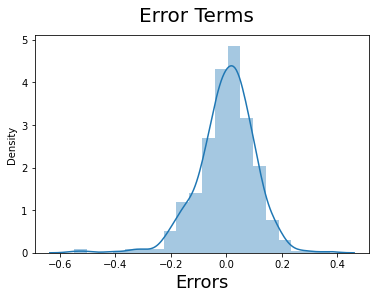

In [75]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

#### from this we see that mean of error terms is centered at zero and it is a normal distribution

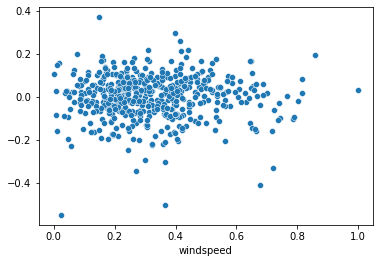

In [76]:
sns.scatterplot(X['windspeed'], y_train-y_train_pred)
plt.show()

#### The points are quite random, so we can say that the model has decent predictive power.

### Step 7: Making predictions using model

#### before making predictions on the final model, we have to scale the test set as well

In [77]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [78]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,cas_to_registered,spring,summer,winter,misty,rainy_or_snowy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.226138,0.255708,0.264840,0.232877,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.189330,0.437258,0.442259,0.423633,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.009709,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.097087,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.165049,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.252427,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,0.990291,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
y_test = df_test.pop('cnt')
X_test = df_test

In [80]:
X = X_test[['windspeed','workingday','cas_to_registered','yr','misty','spring','rainy_or_snowy','summer','winter']]

In [81]:
X_test_lm = sm.add_constant(X)

#### making predicitions on the test data set

In [82]:
y_test_pred = lr12.predict(X_test_lm)

### Step 8: Model Evaluation

In [83]:
# Note this is not final r2 score, i have tried to improve the model by adding some variables which were removed earlier

from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.758741019350185

Text(0, 0.5, 'y_test_pred')

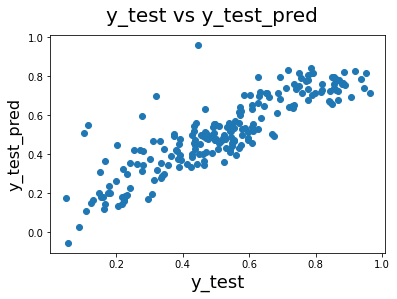

In [84]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

#### the r2score is very close to the r2score obtained from our model, also we can see from the graph that variance is somewhat constant in the error terms, hence we can say that this can be our final model.

### Looking at the model to interpret the variables

In [85]:
lr12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     211.0
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          5.36e-164
Time:                        16:56:01   Log-Likelihood:                 438.38
No. Observations:                 510   AIC:                            -856.8
Df Residuals:                     500   BIC:                            -814.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3620      0.027     13.250      0.000       0.308       0.416
windspeed            -0.1388      0.028     -4.883      0.000      -0.195      -0.083
workingday            0.1463      0.016      9.047      0.000       0.115       0.178
cas_to_registered     0.4093      0.044      9.399      0.000       0.324       0.495
yr                    0.2570      0.009     27.732      0.000       0.239       0.275
misty                -0.0738      0.010     -7.474      0.000      -0.093      -0.054
spring               -0.2597      0.015    -17.866      0.000      -0.288      -0.231
rainy_or_snowy       -0.2514      0.028     -8.961      0.000      -0.306      -0.196
summer               -0.0640      0.013     -4.867      0.000      -0.090      -0.038
winter               -0.0460      0.014     -3.361      0.001      -0.073      -0.019
==============================================================================
Omnibus:                       87.302   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.910
Skew:                          -0.807   Prob(JB):                     2.21e-57
Kurtosis:                       6.110   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Significant Variables

1. cas_to_registered
2. yr
3. winter
4. misty
5. rainy_or_snowy
6. spring
7. workingday
8. windspeed
9. summer

# Interpretations

1. as the number of casual users increase, more people become interested in bike sharing service and register themselves for the same.
2. we can see that yearr has positive impact on cnt, which means from 2018 to 2019 more people are using the service. i.e bike sharing services are gaining popularity.
3. winter has a small positive correlation, this might mean that for small errands or small distances people prefer bikes than cars since it is a hassle to heat up the engine of car.
4. during misty, rainy_or_snowy weather it is definitely more feasible to take a car than a bike, since it becomes difficult to ride a bike in these conditions. however the impact of mist is quite less as compared to rainy_or_snowy conditions.
5. if windspeed is high then too driving bikes becomes difficult.
6. more people use bike service on a workingday than on a holiday.
7. spring has a negative coefficient which is surprising. It might mean that holidays of school kids fall during spring break and hence people move to their hometowns or spend time with their family which leads to less usage of bike service.
8. summer also has a negative coefficient indicating that during hot days people prefer cars rather than bikes since cars have AC in them.